In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\marpaka pradeep sai\\Downloads\\Salary_data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# There exists a Strong Positive Corrleation between "YearsExperience" and "Salary"

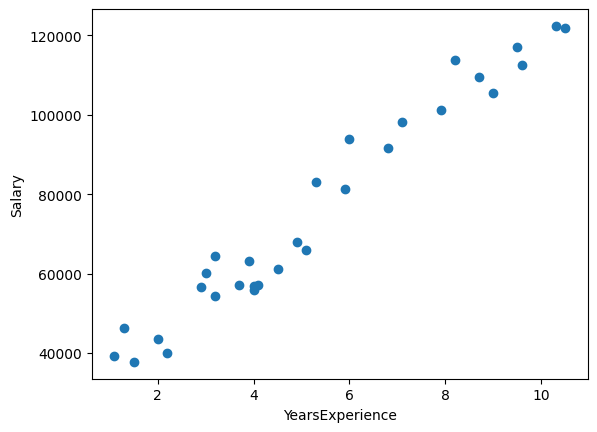

In [6]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

# From the above scatter plot we can conclude that there exists a Linear and Positive Correlation between the variables YearsExperience and Salary

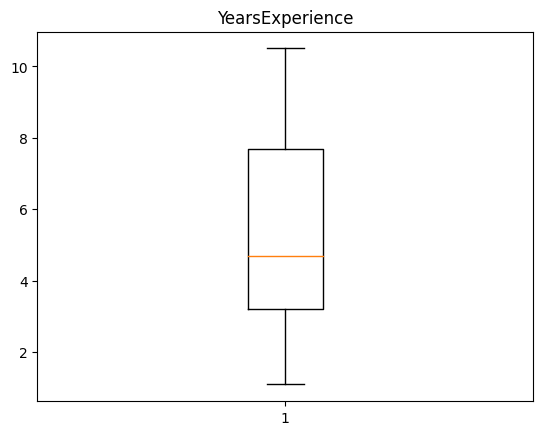

In [7]:
plt.boxplot(df['YearsExperience'])
plt.title("YearsExperience")
plt.show()

# YearsExperience has no outliers

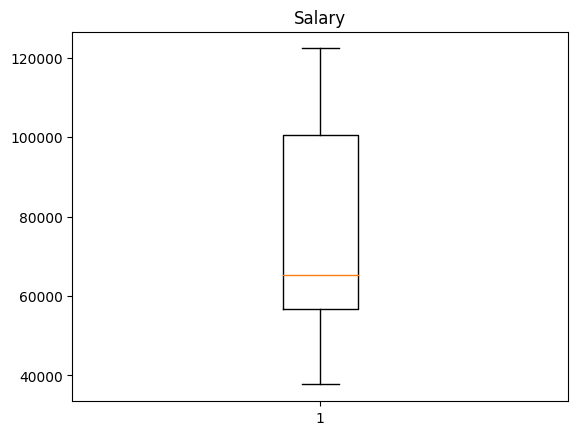

In [8]:
plt.boxplot(df['Salary'])
plt.title("Salary")
plt.show()

# Salary has no outliers

C:\Users\marpaka pradeep sai\AppData\Local\Temp\ipykernel_27204\4057978375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'], bins = 10, kde = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option

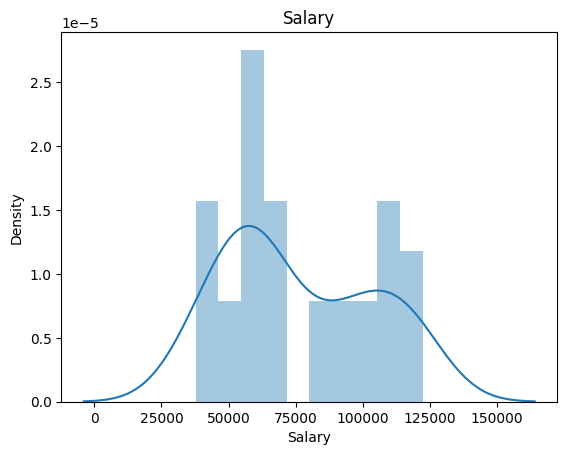

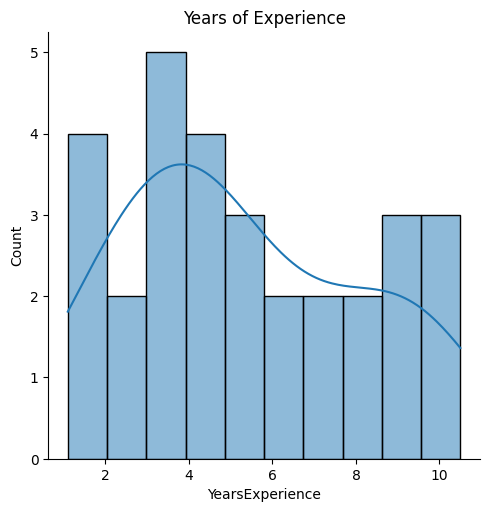

In [9]:
sns.distplot(df['Salary'], bins = 10, kde = True)
plt.title('Salary')
sns.displot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Years of Experience')
plt.show()

# 

# Without any data transformation

In [10]:
# exp = YearsExperience
exp = np.vstack(df['YearsExperience'])
exp

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
sal = np.array(df['Salary'])
sal

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Fitting a Linear Regression model

In [12]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(exp, sal)

LinearRegression()

In [13]:
LR.intercept_

25792.200198668717

In [14]:
LR.coef_

array([9449.96232146])

In [15]:
sal_pred = LR.predict(exp)
sal_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

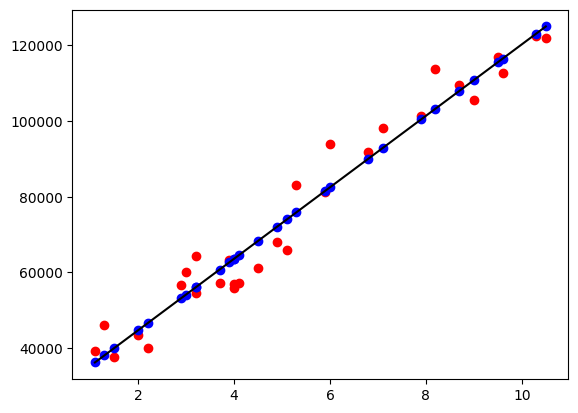

In [16]:
plt.scatter(exp,sal,color = "red")
plt.scatter(exp,sal_pred,color = "blue")
plt.plot(exp,sal_pred,color='black')
plt.show()

In [17]:
# Metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(sal,sal_pred)
print("mean squared error :", mse.round(3))
print("Root mean squared error :", np.sqrt(mse).round(3))

mean squared error : 31270951.722
Root mean squared error : 5592.044


# 

# Square Transformation on YearsExperience

In [18]:
exp_sq = np.square(exp)
exp_sq

array([[  1.21],
       [  1.69],
       [  2.25],
       [  4.  ],
       [  4.84],
       [  8.41],
       [  9.  ],
       [ 10.24],
       [ 10.24],
       [ 13.69],
       [ 15.21],
       [ 16.  ],
       [ 16.  ],
       [ 16.81],
       [ 20.25],
       [ 24.01],
       [ 26.01],
       [ 28.09],
       [ 34.81],
       [ 36.  ],
       [ 46.24],
       [ 50.41],
       [ 62.41],
       [ 67.24],
       [ 75.69],
       [ 81.  ],
       [ 90.25],
       [ 92.16],
       [106.09],
       [110.25]])

In [19]:
sal

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [20]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(exp_sq,sal)

LinearRegression()

In [21]:
LR1.intercept_

48042.585514584905

In [22]:
LR1.coef_

array([776.31877331])

In [23]:
sal_pred1 = LR1.predict(exp_sq)
sal_pred1

array([ 48981.93123029,  49354.56424148,  49789.30275453,  51147.86060783,
        51799.96837741,  54571.42639813,  55029.45447438,  55992.08975329,
        55992.08975329,  58670.38952121,  59850.39405664,  60463.68588756,
        60463.68588756,  61092.50409394,  63763.04067413,  66681.99926178,
        68234.6368084 ,  69849.37985689,  75066.24201354,  75990.06135378,
        83939.56559248,  87176.81487719,  96492.64015692, 100242.25983201,
       106802.15346649, 110924.40615277, 118105.3548059 , 119588.12366292,
       130402.24417514, 133631.73027211])

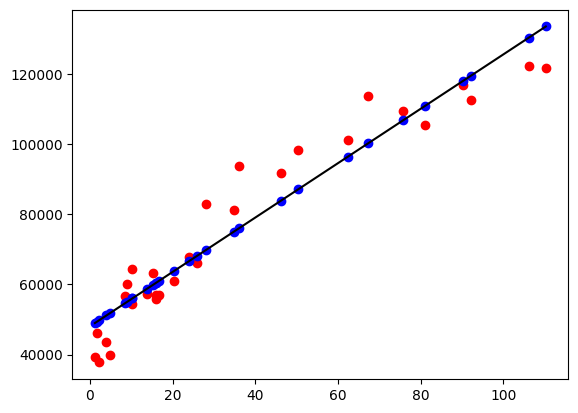

In [24]:
plt.scatter(exp_sq,sal,color = "red")
plt.scatter(exp_sq,sal_pred1,color = "blue")
plt.plot(exp_sq,sal_pred1,color='black')
plt.show()

In [25]:
# metrics
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(sal,sal_pred1)
print("mean squared error :", mse1.round(3))
print("Root mean squared error :", np.sqrt(mse1).round(3))

mean squared error : 61520040.461
Root mean squared error : 7843.471


# 

# Square root transformation on YearsExperience

In [26]:
exp_sqrt = np.sqrt(exp)
exp_sqrt

array([[1.04880885],
       [1.14017543],
       [1.22474487],
       [1.41421356],
       [1.4832397 ],
       [1.70293864],
       [1.73205081],
       [1.78885438],
       [1.78885438],
       [1.92353841],
       [1.97484177],
       [2.        ],
       [2.        ],
       [2.02484567],
       [2.12132034],
       [2.21359436],
       [2.25831796],
       [2.30217289],
       [2.42899156],
       [2.44948974],
       [2.60768096],
       [2.66458252],
       [2.81069386],
       [2.86356421],
       [2.94957624],
       [3.        ],
       [3.082207  ],
       [3.09838668],
       [3.20936131],
       [3.24037035]])

In [27]:
sal

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [28]:
from sklearn.linear_model import LinearRegression
LR2 = LinearRegression()
LR2.fit(exp_sq,sal)

LinearRegression()

In [29]:
LR2.intercept_

48042.585514584905

In [30]:
LR2.coef_

array([776.31877331])

In [31]:
sal_pred2 = LR2.predict(exp_sqrt)
sal_pred2

array([48856.79551303, 48927.72510196, 48993.37795076, 49140.46605253,
       49194.05233701, 49364.60874797, 49387.20907283, 49431.30675405,
       49431.30675405, 49535.86449048, 49575.6922517 , 49595.22306121,
       49595.22306121, 49614.51122369, 49689.4063215 , 49761.04037439,
       49795.76014158, 49829.80554589, 49928.25726306, 49944.17038694,
       50066.97720025, 50111.15094704, 50224.57992763, 50265.62417145,
       50332.39692359, 50371.54183452, 50435.36067307, 50447.92125889,
       50534.07294768, 50558.14584915])

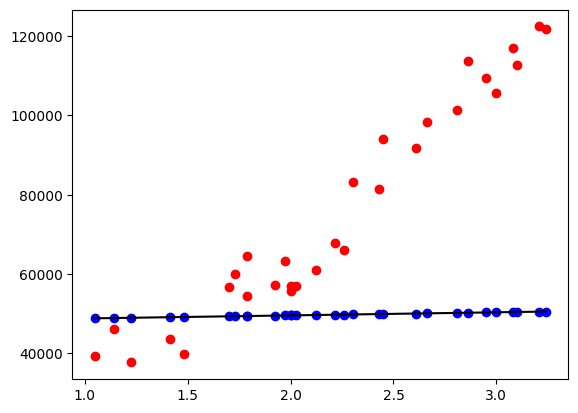

In [32]:
plt.scatter(exp_sqrt,sal,color = "red")
plt.scatter(exp_sqrt,sal_pred2,color = "blue")
plt.plot(exp_sqrt,sal_pred2,color='black')
plt.show()

In [33]:
# metrics
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(sal,sal_pred2)
print("mean squared error :", mse2.round(3))
print("Root mean squared error :", np.sqrt(mse2).round(3))

mean squared error : 1389882178.882
Root mean squared error : 37281.124


# 

# Logarithm transformation on YearsExperience

In [34]:
exp_log = np.log(exp)
exp_log

array([[0.09531018],
       [0.26236426],
       [0.40546511],
       [0.69314718],
       [0.78845736],
       [1.06471074],
       [1.09861229],
       [1.16315081],
       [1.16315081],
       [1.30833282],
       [1.36097655],
       [1.38629436],
       [1.38629436],
       [1.41098697],
       [1.5040774 ],
       [1.58923521],
       [1.62924054],
       [1.66770682],
       [1.77495235],
       [1.79175947],
       [1.91692261],
       [1.96009478],
       [2.06686276],
       [2.10413415],
       [2.16332303],
       [2.19722458],
       [2.2512918 ],
       [2.2617631 ],
       [2.3321439 ],
       [2.35137526]])

In [35]:
sal

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [36]:
from sklearn.linear_model import LinearRegression
LR3 = LinearRegression()
LR3.fit(exp_log,sal)

LinearRegression()

In [37]:
LR3.intercept_

14927.971770057266

In [38]:
LR3.coef_

array([40581.98795978])

In [39]:
sal_pred3 = LR3.predict(exp_log)
sal_pred3

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

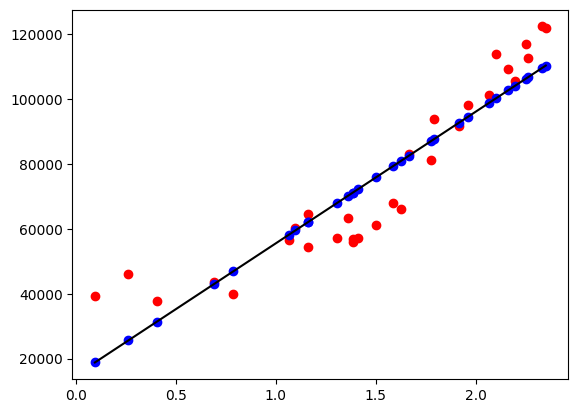

In [40]:
plt.scatter(exp_log,sal,color = "red")
plt.scatter(exp_log,sal_pred3,color = "blue")
plt.plot(exp_log,sal_pred3,color='black')
plt.show()

In [41]:
# metrics
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(sal,sal_pred3)
print("mean squared error :", mse3.round(3))
print("Root mean squared error :", np.sqrt(mse3).round(3))

mean squared error : 106149618.722
Root mean squared error : 10302.894


# 

# Cube transformation on Sorting Time

In [42]:
exp_cube = exp**3
exp_cube

array([[   1.331],
       [   2.197],
       [   3.375],
       [   8.   ],
       [  10.648],
       [  24.389],
       [  27.   ],
       [  32.768],
       [  32.768],
       [  50.653],
       [  59.319],
       [  64.   ],
       [  64.   ],
       [  68.921],
       [  91.125],
       [ 117.649],
       [ 132.651],
       [ 148.877],
       [ 205.379],
       [ 216.   ],
       [ 314.432],
       [ 357.911],
       [ 493.039],
       [ 551.368],
       [ 658.503],
       [ 729.   ],
       [ 857.375],
       [ 884.736],
       [1092.727],
       [1157.625]])

In [43]:
sal

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [44]:
from sklearn.linear_model import LinearRegression
LR4 = LinearRegression()
LR4.fit(exp_cube,sal)

LinearRegression()

In [45]:
LR3.intercept_

14927.971770057266

In [46]:
LR3.coef_

array([40581.98795978])

In [47]:
sal_pred4 = LR4.predict(exp_cube)
sal_pred4

array([ 56006.47740795,  56068.19275343,  56152.14272684,  56481.74258001,
        56670.45185811,  57649.70193   ,  57835.77440927,  58246.8299667 ,
        58246.8299667 ,  59521.40150703,  60138.98255084,  60472.57323467,
        60472.57323467,  60823.26747845,  62405.63183302,  64295.86026666,
        65364.97529311,  66521.3184753 ,  70547.92407618,  71304.82786873,
        78319.56792228,  81418.09160146,  91047.96597114,  95204.77242212,
       102839.73031831, 107863.68725869, 117012.31021032, 118962.18730928,
       133784.6312145 , 138409.57635424])

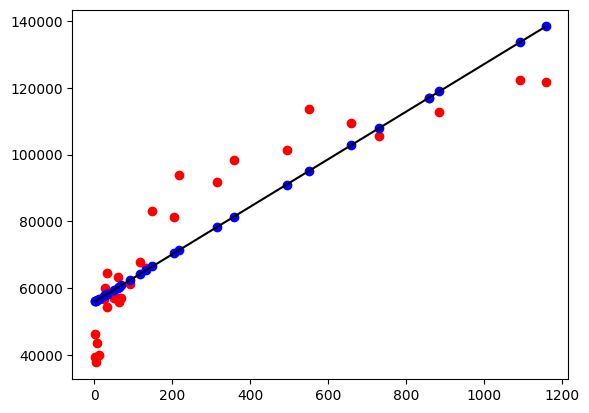

In [48]:
plt.scatter(exp_cube,sal,color = "red")
plt.scatter(exp_cube,sal_pred4,color = "blue")
plt.plot(exp_cube,sal_pred4,color='black')
plt.show()

In [49]:
# metrics
from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(sal,sal_pred4)
print("mean squared error :", mse4.round(3))
print("Root mean squared error :", np.sqrt(mse4).round(3))

mean squared error : 120426604.558
Root mean squared error : 10973.906


# 

# Cuberoot transformation on Sorting Time

In [50]:
exp_cbrt = np.cbrt(exp)
exp_cbrt

array([[1.03228012],
       [1.09139288],
       [1.14471424],
       [1.25992105],
       [1.30059145],
       [1.42604315],
       [1.44224957],
       [1.4736126 ],
       [1.4736126 ],
       [1.54668037],
       [1.57406092],
       [1.58740105],
       [1.58740105],
       [1.60052066],
       [1.65096362],
       [1.69849925],
       [1.72130062],
       [1.7435134 ],
       [1.80696887],
       [1.81712059],
       [1.89453647],
       [1.92199734],
       [1.9916317 ],
       [2.01652968],
       [2.05671012],
       [2.08008382],
       [2.11791179],
       [2.12531714],
       [2.17576711],
       [2.18975957]])

In [51]:
sal

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [52]:
from sklearn.linear_model import LinearRegression
LR5 = LinearRegression()
LR5.fit(exp_cbrt,sal)

LinearRegression()

In [53]:
LR5.intercept_

-57049.503555294534

In [54]:
LR5.coef_

array([78964.32723002])

In [55]:
sal_pred5 = LR5.predict(exp_cbrt)
sal_pred5

array([ 24463.80127465,  29131.60119926,  33342.08647855,  42439.3145126 ,
        45650.82504644,  55557.03415979,  56836.76346182,  59313.32395844,
        59313.32395844,  65083.07159949,  67245.15774558,  68298.5525576 ,
        68298.5525576 ,  69334.53388599,  73317.72833042,  77071.34719867,
        78871.84192098,  80625.85919213,  85636.57753624,  86438.20155351,
        92551.29455621,  94719.7235548 , 100218.35382705, 102184.40558768,
       105357.22707809, 107202.91611405, 110189.97624258, 110774.73442615,
       114758.48280438, 115863.38768083])

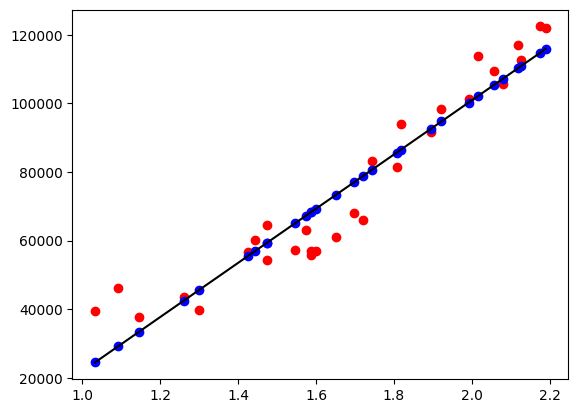

In [56]:
plt.scatter(exp_cbrt,sal,color = "red")
plt.scatter(exp_cbrt,sal_pred5,color = "blue")
plt.plot(exp_cbrt,sal_pred5,color='black')
plt.show()

In [57]:
# metrics
from sklearn.metrics import mean_squared_error
mse5 = mean_squared_error(sal,sal_pred5)
print("mean squared error :", mse5.round(3))
print("Root mean squared error :", np.sqrt(mse5).round(3))

mean squared error : 64433306.68
Root mean squared error : 8027.036


In [58]:
RMSE = []
RMSE.append(np.sqrt(mse).round(3))
RMSE.append(np.sqrt(mse1).round(3))
RMSE.append(np.sqrt(mse2).round(3))
RMSE.append(np.sqrt(mse3).round(3))
RMSE.append(np.sqrt(mse4).round(3))
RMSE.append(np.sqrt(mse5).round(3))

In [59]:
RMSE

[5592.044, 7843.471, 37281.124, 10302.894, 10973.906, 8027.036]

In [60]:
data = {'Transformation' : ['No_transformation', 'Square', 'Square_root', 'Logarithm','Cube', 'Cube_root'],
       'RMSE' : RMSE}

df_RMSE = pd.DataFrame(data)
df_RMSE

,Transformation,RMSE
0,No_transformation,5592.044
1,Square,7843.471
2,Square_root,37281.124
3,Logarithm,10302.894
4,Cube,10973.906
5,Cube_root,8027.036


In [61]:
df_RMSE[df_RMSE['RMSE'] == df_RMSE['RMSE'].min()]

,Transformation,RMSE
0,No_transformation,5592.044


# As we can see that the No data transformation has given the least Root Mean Squared error (RMSE) = 5592.044 compared to other transformations. Hence, we are going to predict our values without any data transformation

# Predicted Values

In [62]:
Predicted_Delivery_time = pd.DataFrame(sal_pred)
Predicted_Delivery_time

,0
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [63]:
df_new = pd.concat([df,Predicted_Delivery_time], axis = 1)
df_new.rename(columns = {0 : "Predicted_Salary"}, inplace = True)
df_new

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
